<a href="https://colab.research.google.com/github/bpandey369/AQI-Thesis/blob/main/Thesis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [ ]:
df = pd.read_csv('/content/Weather.csv')

In [ ]:
df.head(5)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1483228800,2017-01-01 00:00:00 +0000 UTC,20700,Kathmandu,27.717245,85.32396,282.73,3000.0,281.97,282.73,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50n
1,1483232400,2017-01-01 01:00:00 +0000 UTC,20700,Kathmandu,27.717245,85.32396,282.89,2000.0,281.81,282.46,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50n
2,1483236000,2017-01-01 02:00:00 +0000 UTC,20700,Kathmandu,27.717245,85.32396,283.62,2500.0,282.54,283.15,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d
3,1483239600,2017-01-01 03:00:00 +0000 UTC,20700,Kathmandu,27.717245,85.32396,284.35,2000.0,283.74,284.03,...,NaN,NaN,NaN,NaN,NaN,20,701,Mist,mist,50d
4,1483243200,2017-01-01 04:00:00 +0000 UTC,20700,Kathmandu,27.717245,85.32396,283.49,2500.0,281.42,282.85,...,NaN,NaN,NaN,NaN,NaN,75,701,Mist,mist,50d


In [ ]:
df.shape

(60480, 28)

In [ ]:
df.columns

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed',
       'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60480 entries, 0 to 60479
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   60480 non-null  int64  
 1   dt_iso               60480 non-null  object 
 2   timezone             60480 non-null  int64  
 3   city_name            60480 non-null  object 
 4   lat                  60480 non-null  float64
 5   lon                  60480 non-null  float64
 6   temp                 60480 non-null  float64
 7   visibility           59365 non-null  float64
 8   dew_point            60476 non-null  float64
 9   feels_like           60480 non-null  float64
 10  temp_min             60480 non-null  float64
 11  temp_max             60480 non-null  float64
 12  pressure             60480 non-null  int64  
 13  sea_level            0 non-null      float64
 14  grnd_level           0 non-null      float64
 15  humidity             60480 non-null 

In [ ]:
df = df[['dt_iso','temp','visibility', 'dew_point', 'feels_like', 'temp_min', 'temp_max',
       'pressure',  'humidity', 'wind_speed','wind_deg', 'wind_gust', 'rain_1h',
       'clouds_all', 'weather_main', 'weather_description',
       'weather_icon']]

In [ ]:
df.sample(5)

,dt_iso,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon
15488,2018-09-21 17:00:00 +0000 UTC,295.58,6000.0,294.57,296.33,292.06,300.26,1021,94,1.54,150,NaN,0.53,75,Rain,light rain,10n
22132,2019-06-21 05:00:00 +0000 UTC,303.04,8000.0,294.70,305.97,299.59,308.10,1013,61,1.03,0,NaN,0.19,40,Rain,light rain,10d
41812,2021-08-25 20:00:00 +0000 UTC,297.19,NaN,296.51,298.16,292.81,301.44,1002,96,0.87,189,NaN,0.11,100,Rain,light rain,10n
23609,2019-08-18 00:00:00 +0000 UTC,297.10,7000.0,296.25,298.03,294.03,302.53,1009,95,1.00,0,NaN,0.31,20,Rain,light rain,10d
3914,2017-06-09 23:00:00 +0000 UTC,296.32,4000.0,295.30,297.15,293.35,301.49,1011,94,0.00,0,NaN,NaN,75,Mist,mist,50n


In [ ]:
df.describe()

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all
count,60480.000000,59365.000000,60476.000000,60480.000000,60480.000000,60480.000000,60480.000000,60480.000000,60480.000000,60480.000000,10371.000000,20753.000000,60480.000000
mean,292.956943,6411.337977,288.660359,293.243611,289.419300,298.481675,1014.646974,76.071396,2.096442,123.673545,0.197740,1.137986,46.272421
std,81.668717,1832.601922,6.506936,81.739241,81.684313,6.464683,6.691667,19.122296,40.675965,110.422590,1.348108,1.843457,26.304586
min,-9722.990000,50.000000,260.420000,-9729.990000,-9728.410000,-8.510000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,289.310000,6000.000000,283.120000,288.880000,285.810000,294.200000,1011.000000,64.000000,1.030000,0.000000,0.000000,0.240000,20.000000
50%,295.250000,7000.000000,289.200000,295.460000,291.780000,300.190000,1015.000000,81.000000,1.540000,110.000000,0.000000,0.530000,40.000000
75%,297.960000,7000.000000,294.950000,298.580000,294.370000,302.910000,1018.000000,93.000000,2.600000,220.000000,0.000000,1.260000,75.000000
max,306.530000,10000.000000,301.260000,311.070000,303.960000,312.470000,1089.000000,100.000000,9999.000000,980.000000,23.700000,34.800000,100.000000


In [ ]:
df.weather_main.value_counts()

Clouds          25573
Rain            19771
Mist             9276
Haze             3090
Thunderstorm     1668
Drizzle           888
Clear             119
Fog                89
Smoke               3
Dust                2
Snow                1
Name: weather_main, dtype: int64

In [ ]:
df.weather_description.value_counts()

few clouds                      15135
light rain                      13168
mist                             9276
broken clouds                    6085
moderate rain                    5543
scattered clouds                 4220
haze                             3090
heavy intensity rain              968
thunderstorm                      782
drizzle                           773
thunderstorm with rain            578
thunderstorm with light rain      208
overcast clouds                   133
sky is clear                      119
light intensity drizzle           115
fog                                89
thunderstorm with heavy rain       61
very heavy rain                    42
proximity moderate rain            33
proximity thunderstorm             31
shower rain                        11
thunderstorm with drizzle           8
heavy intensity shower rain         3
smoke                               3
dust                                2
light intensity shower rain         2
proximity sh

In [ ]:
df.weather_icon.value_counts()

10d    12332
02n     9217
10n     7422
50d     6966
02d     5918
50n     5494
04n     3810
04d     2408
03n     2232
03d     1988
11n     1031
11d      637
09d      552
09n      353
01n       96
01d       23
13d        1
Name: weather_icon, dtype: int64

In [ ]:
df = df.rename(columns={'dt_iso':'date'})

In [ ]:
df.sample()

,date,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon
10574,2018-03-08 23:00:00 +0000 UTC,286.24,6000.0,284.13,285.88,283.45,291.09,1018,87,1.54,110,NaN,NaN,20,Clouds,few clouds,02n


In [ ]:
def split_fun(data):
  return data.split('+')[0]

In [ ]:
df['date'] = df['date'].apply(split_fun)

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon
date,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,282.73,3000.0,281.97,282.73,278.72,288.63,1021,95,0.00,0,NaN,NaN,20,Mist,mist,50n
2017-01-01 01:00:00,282.89,2000.0,281.81,282.46,279.30,288.66,1023,93,1.54,160,NaN,NaN,75,Mist,mist,50n
2017-01-01 02:00:00,283.62,2500.0,282.54,283.15,279.30,289.96,1023,93,2.10,100,NaN,NaN,75,Mist,mist,50d
2017-01-01 03:00:00,284.35,2000.0,283.74,284.03,281.12,290.76,1023,96,0.00,0,NaN,NaN,20,Mist,mist,50d
2017-01-01 04:00:00,283.49,2500.0,281.42,282.85,282.21,285.55,1025,87,1.03,0,NaN,NaN,75,Mist,mist,50d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-16 19:00:00,297.09,7000.0,294.98,297.84,294.30,299.52,1016,88,2.06,90,NaN,NaN,75,Clouds,broken clouds,04n
2023-09-16 20:00:00,296.63,7000.0,295.61,297.49,294.25,299.47,1015,94,2.06,50,NaN,NaN,75,Clouds,broken clouds,04n
2023-09-16 21:00:00,296.63,7000.0,295.61,297.49,294.25,299.47,1015,94,1.03,0,NaN,NaN,75,Clouds,broken clouds,04n


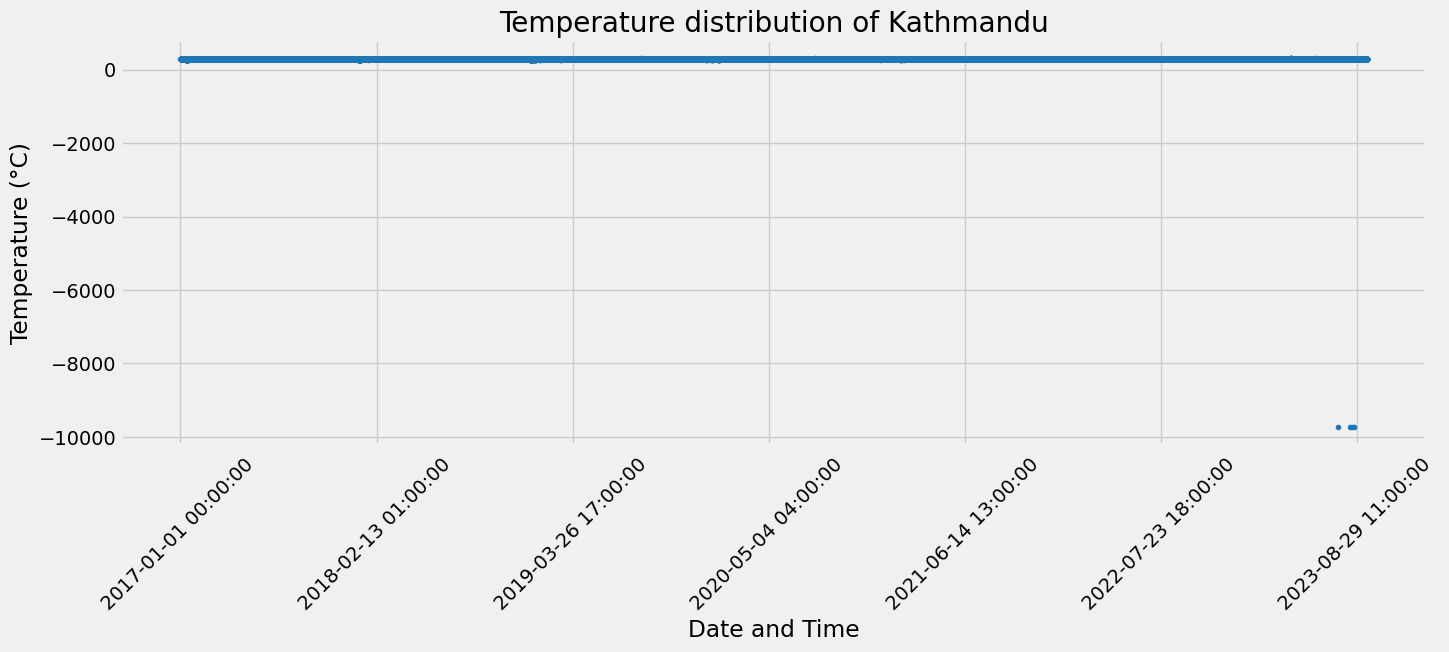

In [ ]:
df['temp'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Temperature distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

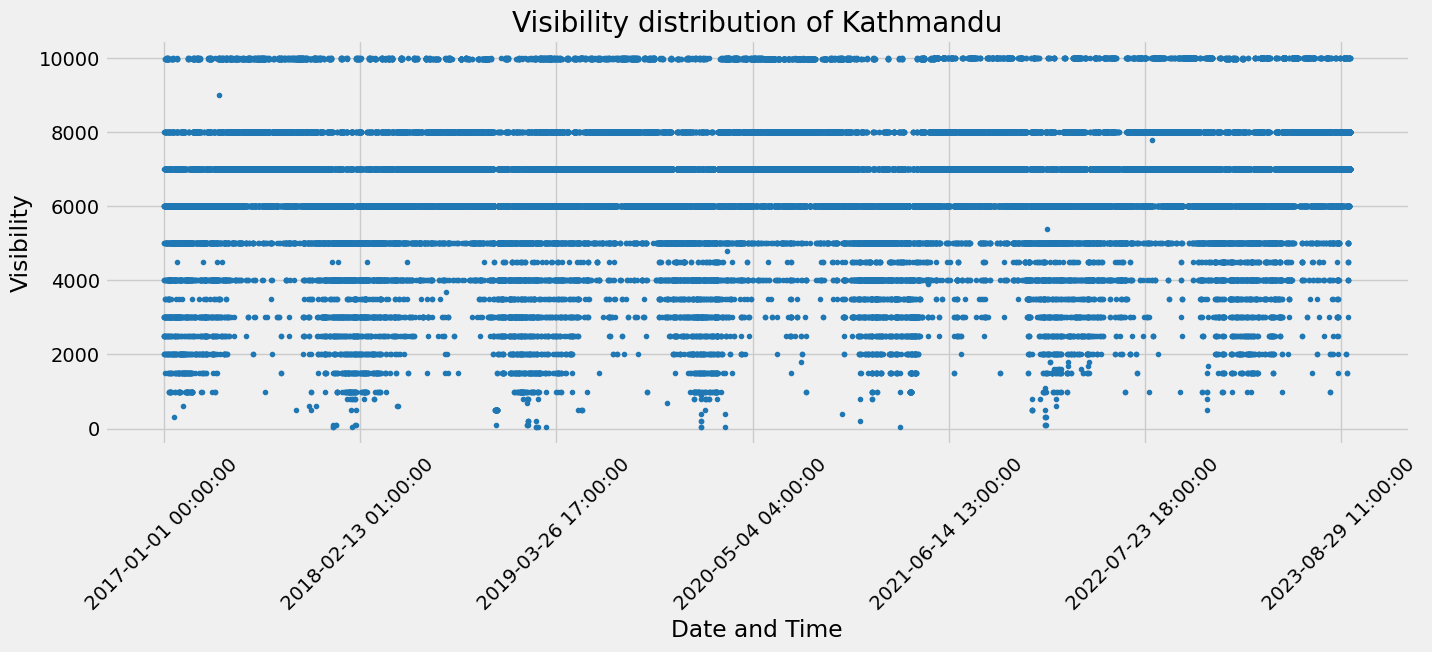

In [ ]:
df['visibility'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Visibility distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Visibility')
plt.xticks(rotation=45)
plt.show()

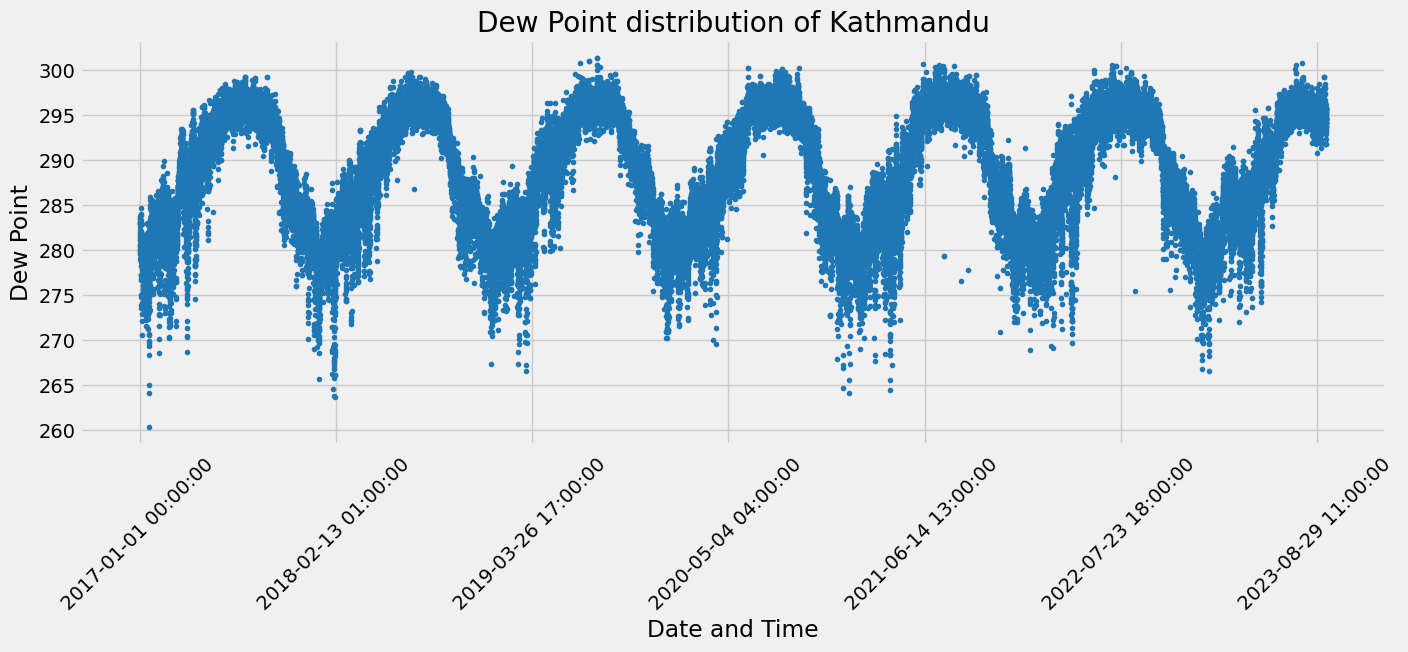

In [ ]:
df['dew_point'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Dew Point distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Dew Point')
plt.xticks(rotation=45)
plt.show()

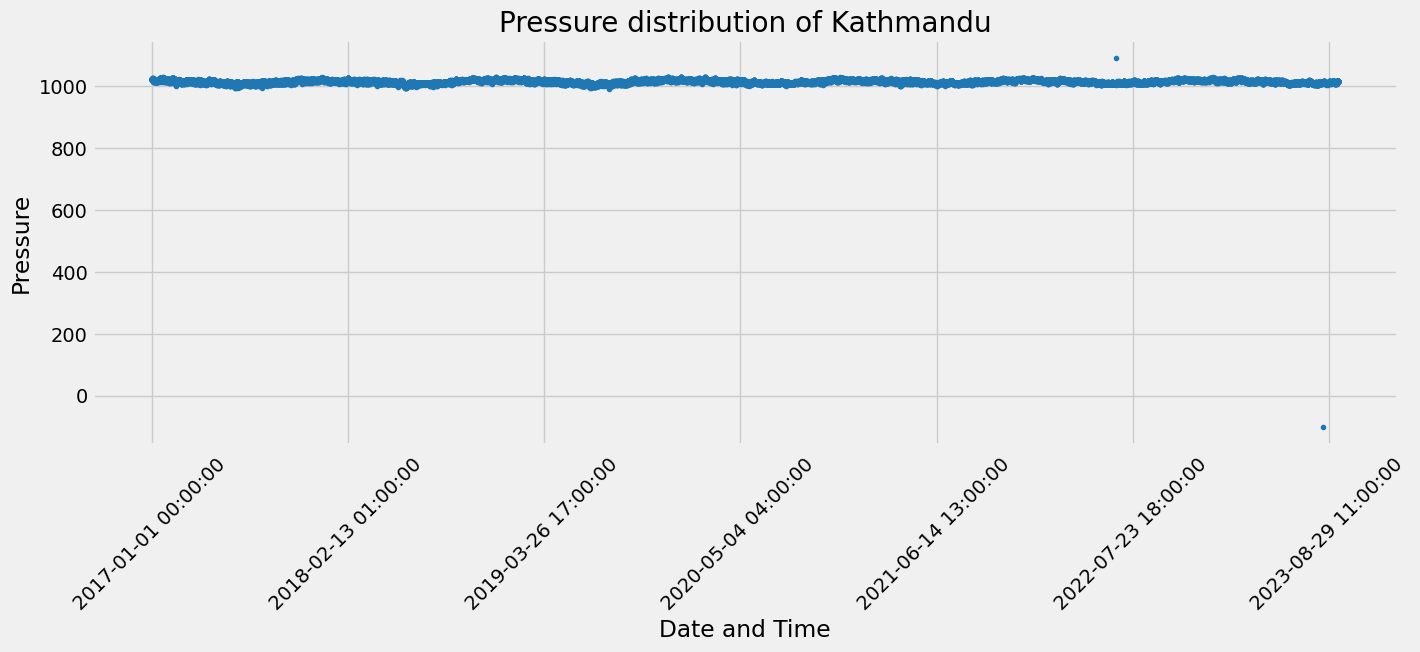

In [ ]:
df['pressure'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Pressure distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Pressure')
plt.xticks(rotation=45)
plt.show()

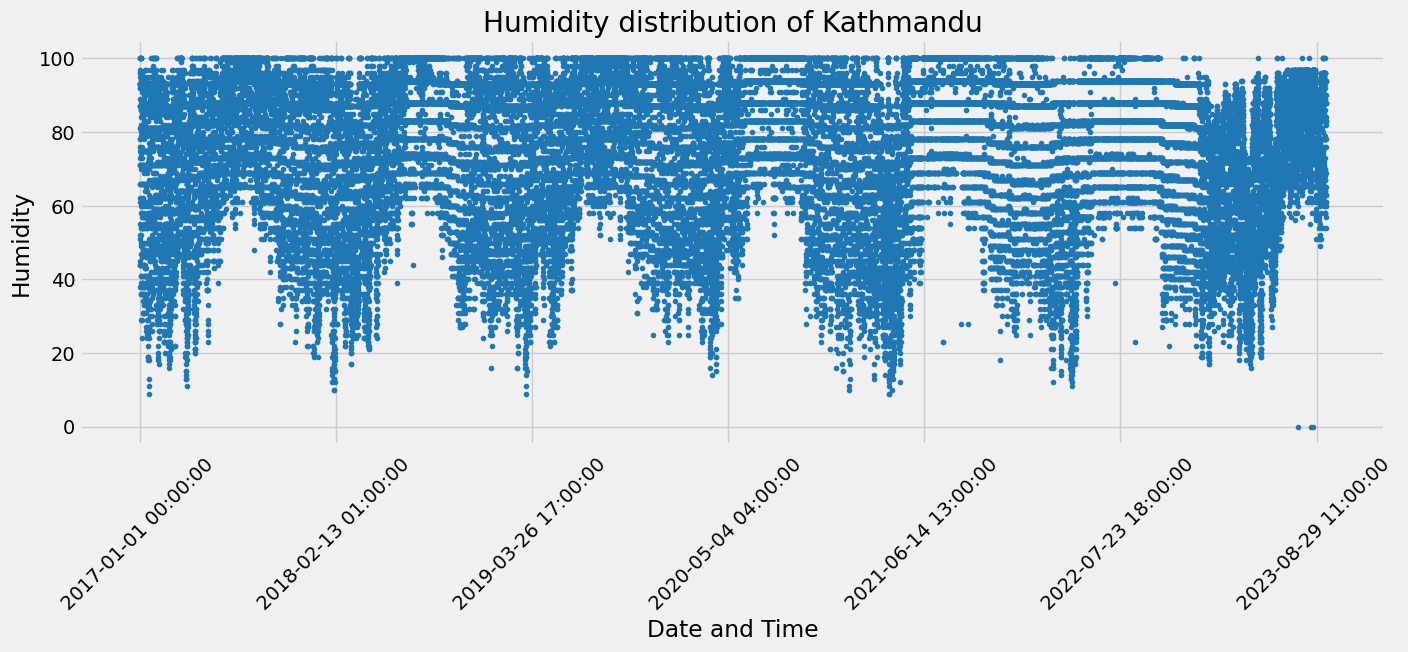

In [ ]:
df['humidity'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Humidity distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.show()

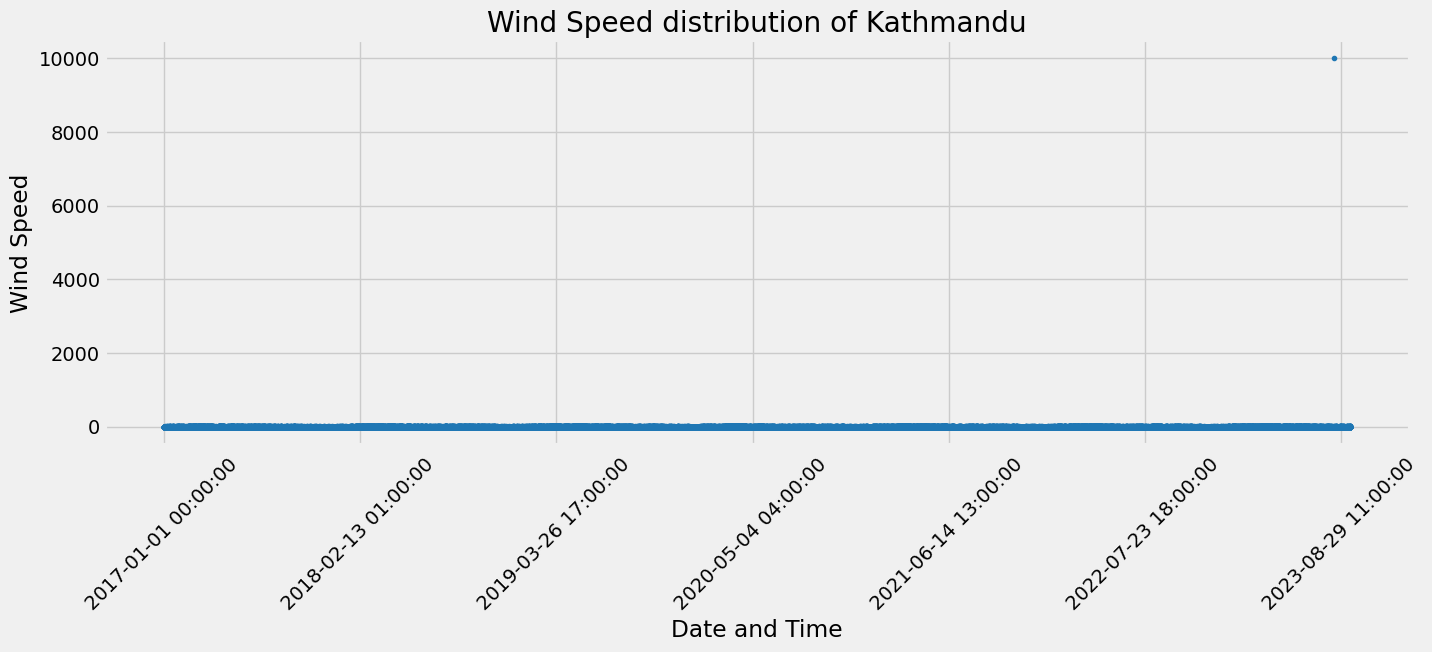

In [ ]:
df['wind_speed'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Wind Speed distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)
plt.show()

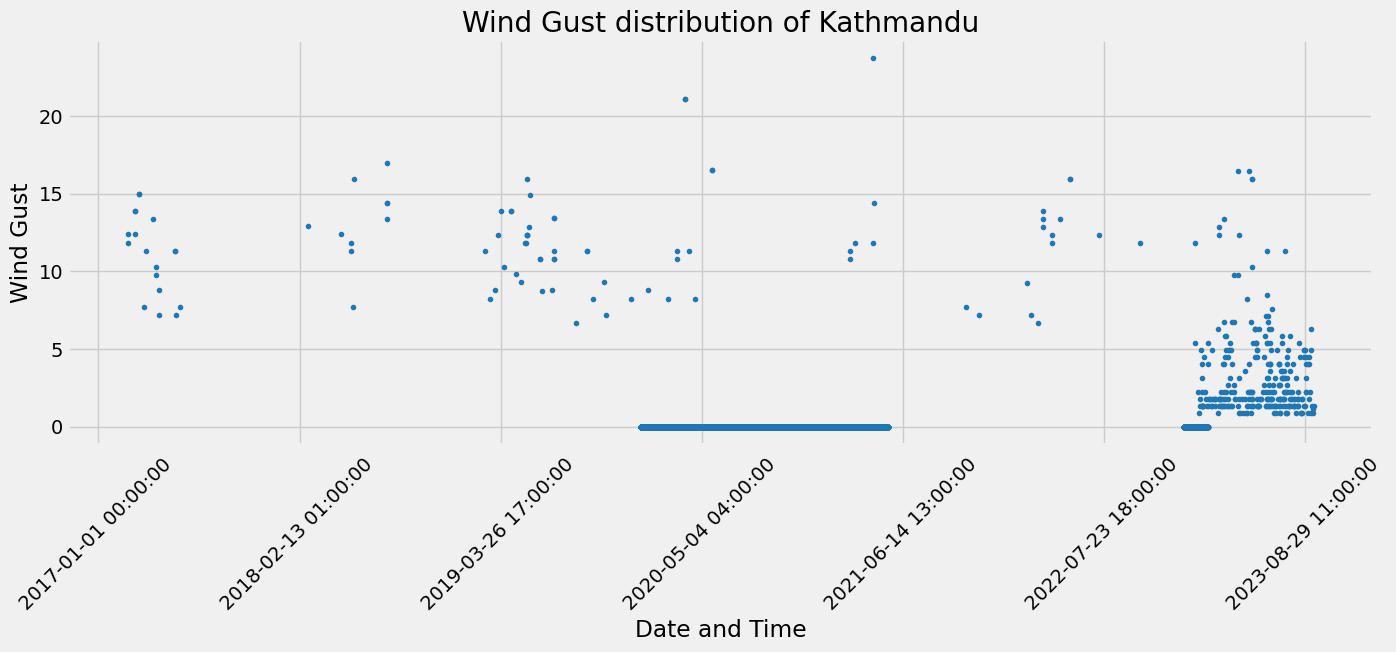

In [ ]:
df['wind_gust'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Wind Gust distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Wind Gust')
plt.xticks(rotation=45)
plt.show()

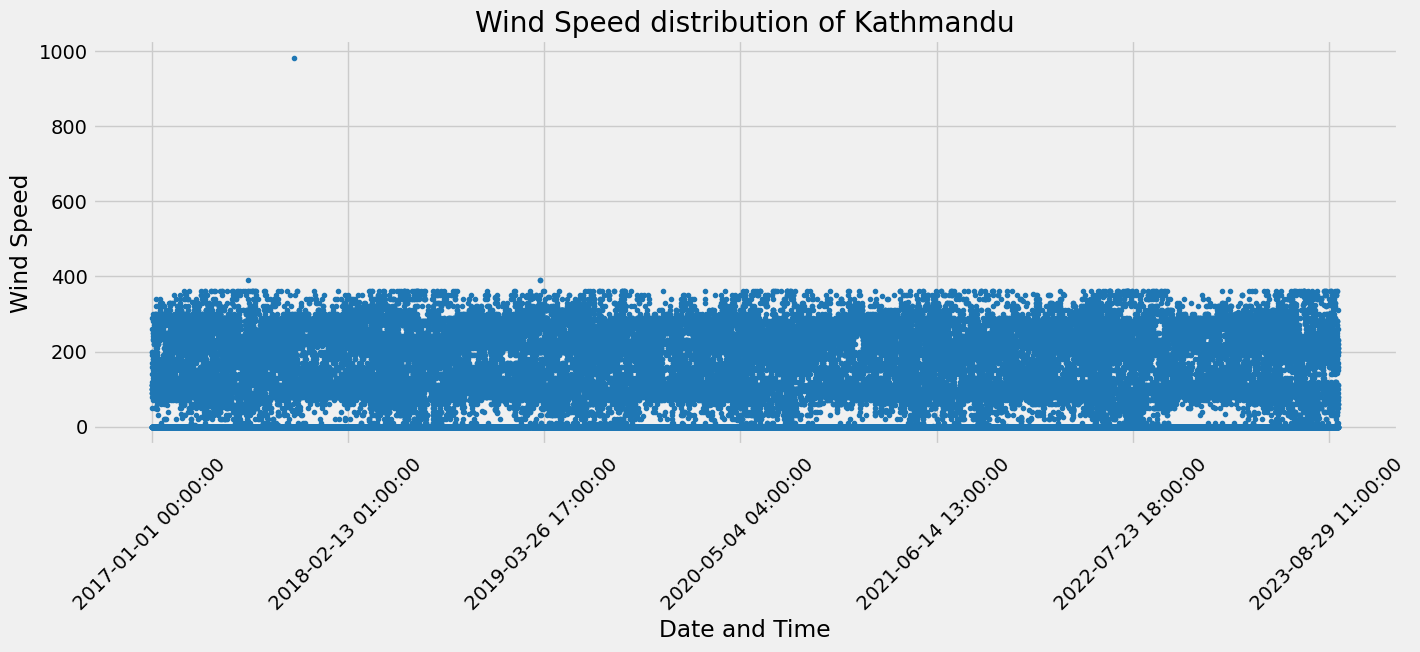

In [ ]:
df['wind_deg'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Wind Speed distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)
plt.show()

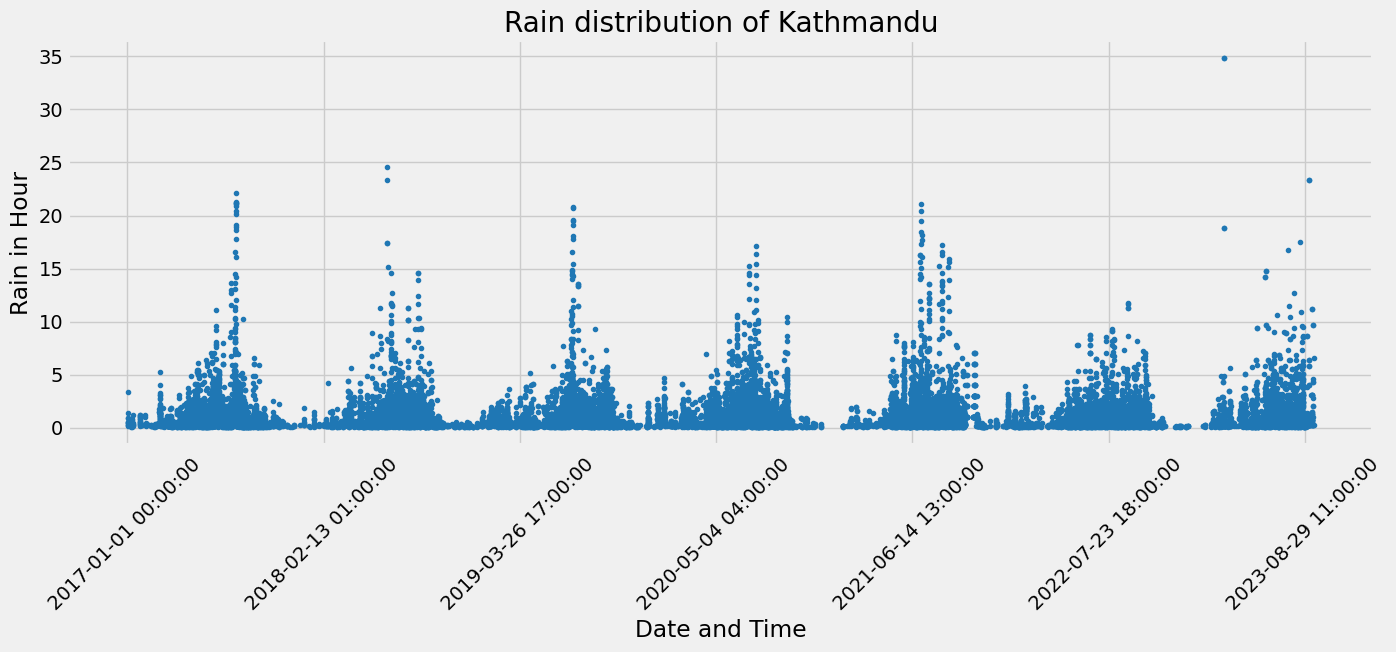

In [ ]:
df['rain_1h'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Rain distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Rain in Hour')
plt.xticks(rotation=45)
plt.show()

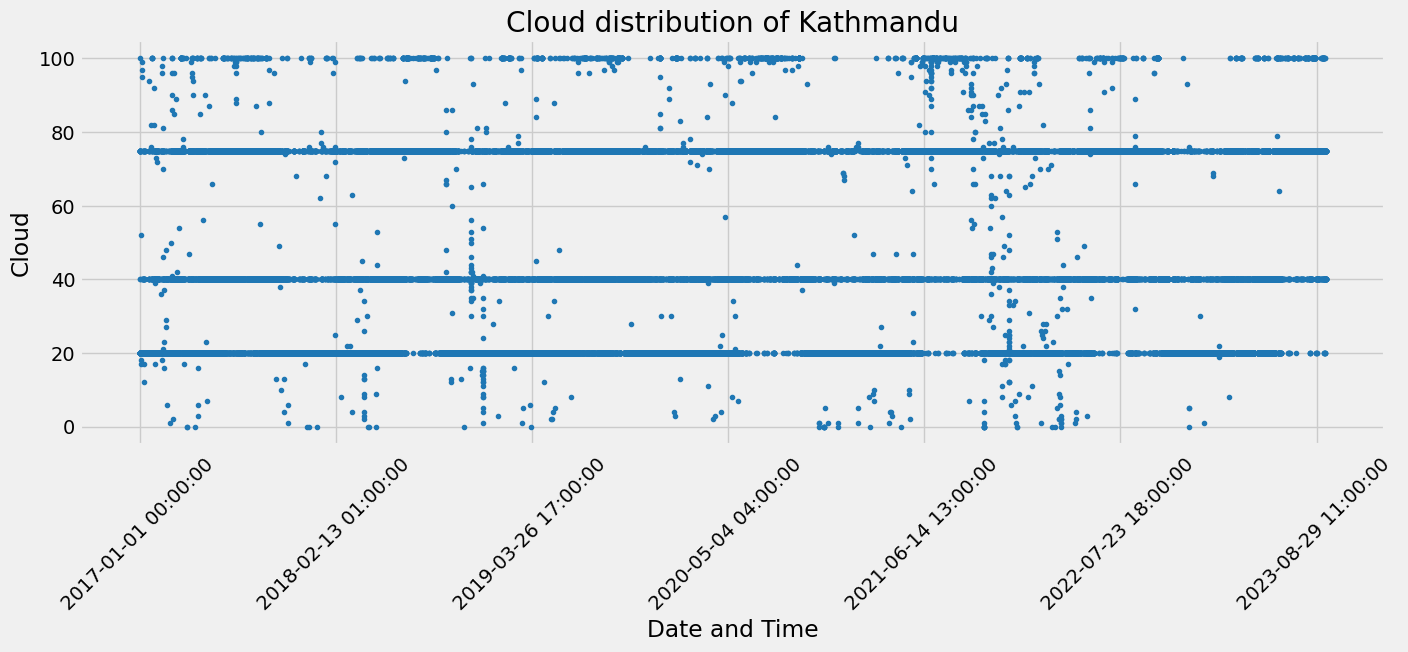

In [ ]:
df['clouds_all'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Cloud distribution of Kathmandu')
plt.xlabel('Date and Time')
plt.ylabel('Cloud')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.sample()

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon
date,,,,,,,,,,,,,,,,
2021-05-16 21:00:00,293.86,7000.0,288.64,293.87,290.97,298.62,1012,72,4.0,80,0.0,NaN,20,Clouds,few clouds,02n


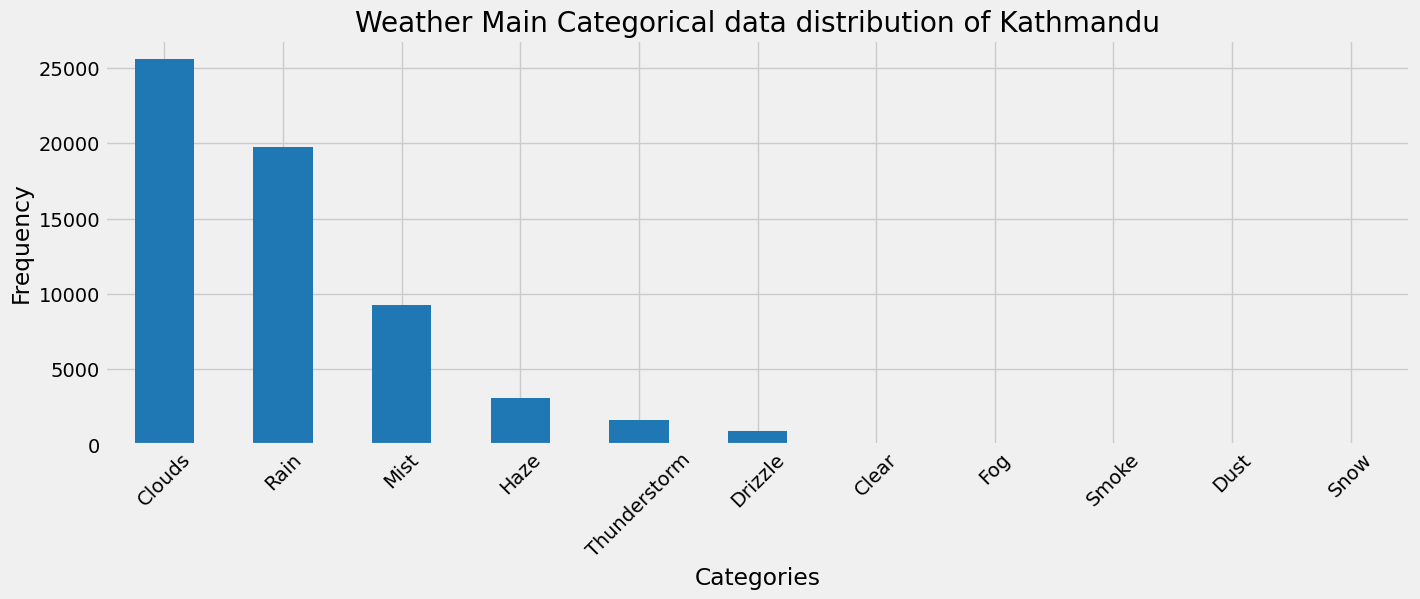

In [ ]:
df['weather_main'].value_counts().plot(kind='bar',
                                 figsize=(15, 5),
                                 color=color_pal[0],
                                 title='Weather Main Categorical data distribution of Kathmandu')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

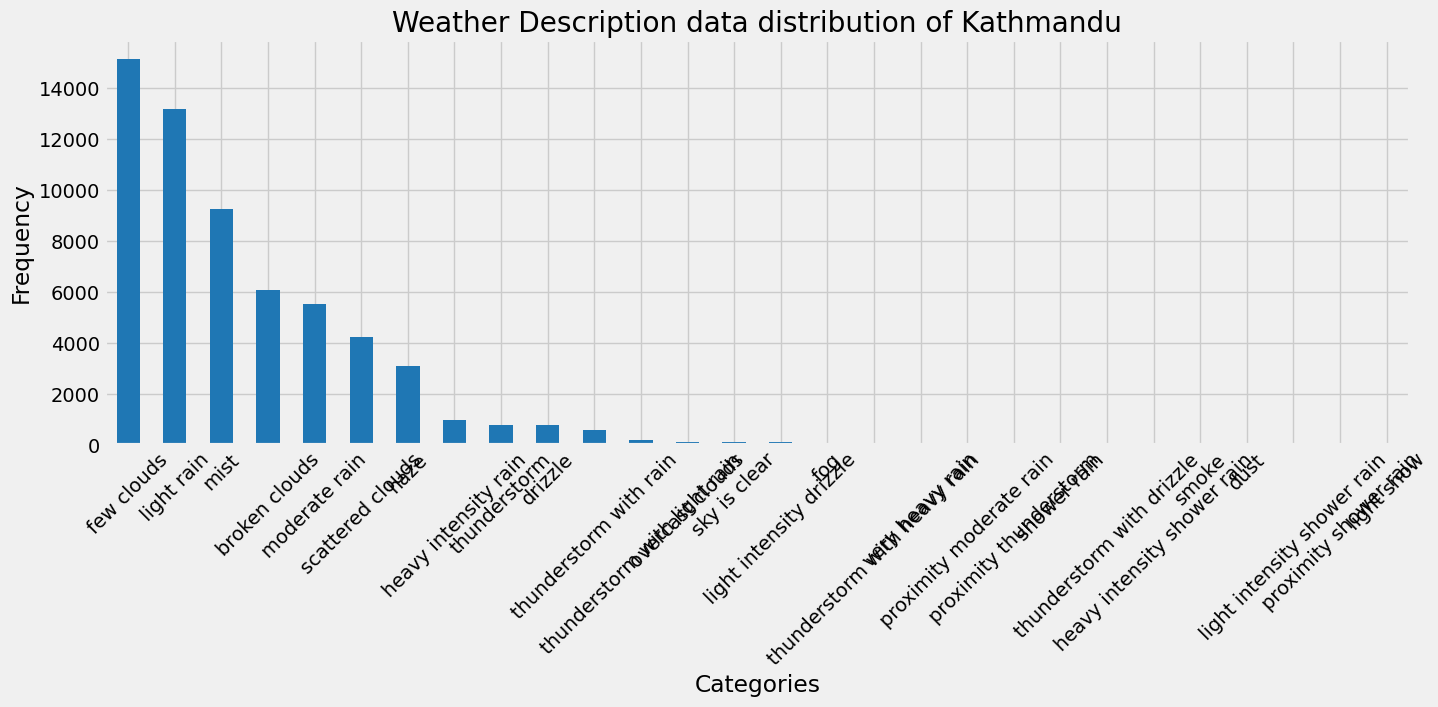

In [ ]:
df['weather_description'].value_counts().plot(kind='bar',
                                 figsize=(15, 5),
                                 color=color_pal[0],
                                 title='Weather Description data distribution of Kathmandu')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

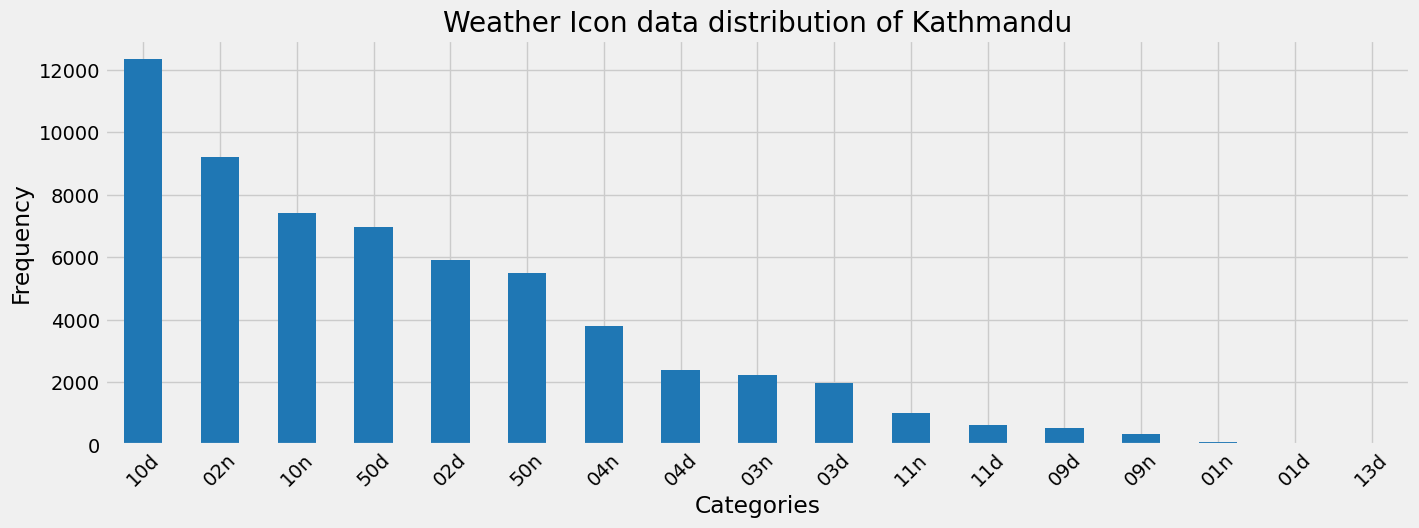

In [ ]:
df['weather_icon'].value_counts().plot(kind='bar',
                                 figsize=(15, 5),
                                 color=color_pal[0],
                                 title='Weather Icon data distribution of Kathmandu')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_csv('Main_Weather_v2.csv')

,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,clouds_all,weather_main,weather_description,weather_icon
date,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,282.73,3000.0,281.97,282.73,278.72,288.63,1021,95,0.00,0,NaN,NaN,20,Mist,mist,50n
2017-01-01 01:00:00,282.89,2000.0,281.81,282.46,279.30,288.66,1023,93,1.54,160,NaN,NaN,75,Mist,mist,50n
2017-01-01 02:00:00,283.62,2500.0,282.54,283.15,279.30,289.96,1023,93,2.10,100,NaN,NaN,75,Mist,mist,50d
2017-01-01 03:00:00,284.35,2000.0,283.74,284.03,281.12,290.76,1023,96,0.00,0,NaN,NaN,20,Mist,mist,50d
2017-01-01 04:00:00,283.49,2500.0,281.42,282.85,282.21,285.55,1025,87,1.03,0,NaN,NaN,75,Mist,mist,50d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-16 19:00:00,297.09,7000.0,294.98,297.84,294.30,299.52,1016,88,2.06,90,NaN,NaN,75,Clouds,broken clouds,04n
2023-09-16 20:00:00,296.63,7000.0,295.61,297.49,294.25,299.47,1015,94,2.06,50,NaN,NaN,75,Clouds,broken clouds,04n
2023-09-16 21:00:00,296.63,7000.0,295.61,297.49,294.25,299.47,1015,94,1.03,0,NaN,NaN,75,Clouds,broken clouds,04n
